## Example of performing linear least squares fitting

first we import numpt and matplotlib as usual

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

now let's generate some random data about a trend line

In [3]:
#set a random number seed
np.random.seed(119)

#set number of data points
npoints = 50

#set x
x = np.linspace(0,10.,npoints)

#set slope, intercept and scatter rms
m = 2.0
b = 1.0
sigma = 2.0

#generate y points
y = m*x + b + np.random.normal(scale=sigma, size=npoints)
y_err = np.full(npoints,sigma)

Text(0, 0.5, 'y')

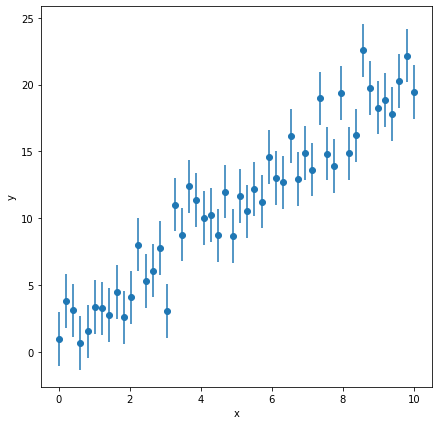

In [4]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')

# method #1, polyfit()

In [5]:
m_fit, b_fit = np.poly1d(np.polyfit(x,y,1,w=1./y_err))
print("best fit slope = ", m_fit)
print("best fit intercept = ", b_fit)

y_fit = m_fit*x + b_fit

best fit slope =  1.9634043470399505
best fit intercept =  1.283010681296193


# Plot Result

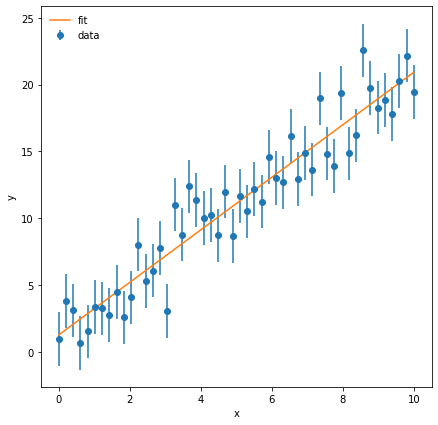

In [6]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err, fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=2,frameon=False)

# Method #2, scipy + optimize

In [7]:
#import optimize from scipy
from scipy import optimize

#define the function to fit
def f_line(x, m, b):
    return m*x +b

#perform the fit
params, params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)
m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.2830106890542259
